# Executive Summary

In this exercise, we compared the execution of the ***selection sort*** for various arrays sizes. The procedure to complete the exercises consisted of 1) randomly generate the array of various integer size using array size 5000 as a starting point increased by 5000 up to 25,000, 2) execute the selection sort algorithm and measure the execution time, 3) record the results in a pandas data frame, and finally 4) plot the outcome of the analysis. 


For this exercise I used the python's default ***timeit*** function that reports times in seconds (for previous exercise %timeit magic from IPython was used). Therefore the final result is converted into milliseconds by using a 1000x multiplier. The time to sort 5000 integers takes about 980 ms (0.98 s). The time increase exponential as the size of the array increase. For our largest array, the time has increased to approximately 25,000 ms (25 s). The times of execution for each array size can be observed in the following graph:


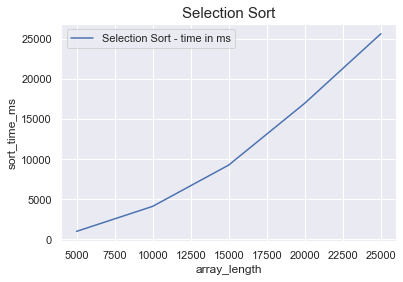


Big O for selection sort is O($n^2$). The results of the analysis show that as the array size increase the execution time increases exponentially.  This graph above shows exactly that. This exponential increase in execution time is exactly what we would expect based on the Big O notation.

In [2]:
import copy
import numpy as np
import timeit
import inspect

In [3]:
def create_random_array(low,high,size,seed):    
    np.random.seed(seed)
    integer_array = np.random.randint(low,high,size)   
    return integer_array  #  np.sort(integer_array, kind='quicksort' )

# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

def selectionSort(arr):
  newArr = []
 
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

# Section #1. 

1. We will again generate random data for this assignment. Please set up five data arrays of length
5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use
either integers or floating point). Ensure that a common random number seed is used to generate
each of the arrays.

### Lets create arrays

In [4]:
    
array_5000 = list(create_random_array(low=1,high=25000+1,size=5000, seed=1))
array_10000 =  list(create_random_array(low=1,high=25000+1,size=10000, seed=1))
array_15000 =  list(create_random_array(low=1,high=25000+1,size=15000, seed=1))
array_20000 =  list(create_random_array(low=1,high=25000+1,size=20000, seed=1))
array_25000 =  list(create_random_array(low=1,high=25000+1,size=25000, seed=1))

arrays = [array_5000,array_10000, array_15000,array_20000,array_25000 ]

### Discussion #1

The random data is generated using numpy's and integers were pulled from the uniform random distribution.

# Section #2.

2. Execute the base algorithm (Selection Sort) for each of the random number arrays, noting the
execution time with each execution. Use one of the timing methods we learned in class

In [5]:
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [6]:
results_sort = []
for array  in arrays:
    array_temp = copy.deepcopy(array)
    array_name = retrieve_name(array)[0]
    results = timeit.timeit('selectionSort({})'.format("array_temp"), setup='from __main__ import selectionSort, {}'.format("array_temp"), number=10)
    print(array_name,results)
    results_sort.append(results*1000)


array_5000 0.9478696229999741
array_10000 3.7629675570000245
array_15000 8.374671970999998
array_20000 14.845370555000045
array_25000 23.408704459999967


### Discussion #3

In this example, we have sorted the arrays using the selection sort algorithm. We have looped over the collection of arrays and using timeit function estimated the execution time to sort each array. Note that I used deepcopy() to prevent the original array to be modified with selection sort, which it would be due to ***pop*** method that that pop the elements from python's list. The copy operation is not counted toward the time of execution.

# Section #3.

3. Just as in the last assignment, please organize the results of the study into a table showing the size
of data array and the time taken to sort the array. Discuss the differences in timing and how they
relate to data type and length of array.

In [57]:
data = [
    [5000,10000,15000,20000,25000],
    results_sort     
] 
data_df = pd.DataFrame(data).T
data_df.columns =['array_length','sort_time_ms' ]
data_df

,array_length,sort_time_ms
0,5000.0,992.178680
1,10000.0,4109.010314
2,15000.0,9262.160126
3,20000.0,16976.480263
4,25000.0,25643.194229


### Discussion #2.

We create dataset with array size and sort times in ms. The original times is reported in seconds so it got multiplied by 1000.  

# Section #4.

4. Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal
axis and with execution time in milliseconds on the vertical axis. The plot should show execution time
against problem size for each form of the algorithm being tested.

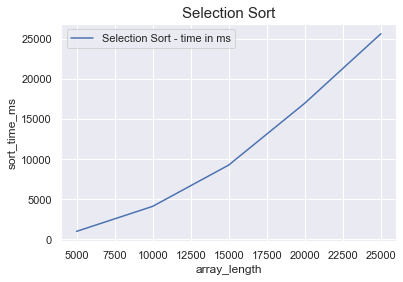

In [61]:
 
sns.lineplot(data=data_df, x="array_length", y="sort_time_ms", label = 'Selection Sort - time in ms')
plt.legend()
plt.title('Selection Sort',fontsize= 15);

### Discussion #4.

Selection sort has a big O of O($n^2$). The expectation is that when represented graphically the execution time increase in an exponential fashion. We can observe the exponential shape in the execution time plot. In this graph Y-axis represents the time of execution in milliseconds (ms) while the X-axis represents the array. The graph shape is consistent with the Big O notation and expected time of execution.  